In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
endpoint_url = "https://api.coingecko.com/api/v3/ping"

params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,
    "page": 1
}

reponse = requests.get(endpoint_url)

if reponse.status_code == 200:
    print(reponse.json())
else:
    print("Error: ", reponse.status_code)

{'gecko_says': '(V3) To the Moon!'}


# Having a look at CoinGecko API

An API requires an endpoint direcoty and maybe parameters. Tha's not the case for the end point currencies. We just need the available currencies

#### Coins


Gecko offers literally tons of different coins (10k+)... which is kinda crazy, so let's only focus on the treding to only pick 10 of them.. and let's search what the end point `search/trending` has for us

In [407]:
coingecko = "https://api.coingecko.com/api/v3/"
trend_coins_ep = "search/trending"

trend_coins = requests.get(coingecko + trend_coins_ep).json()
trend_coins

{'coins': [{'item': {'id': 'sei-network',
    'coin_id': 28205,
    'name': 'Sei',
    'symbol': 'SEI',
    'market_cap_rank': 97,
    'thumb': 'https://assets.coingecko.com/coins/images/28205/thumb/TKmaTqMv_400x400.jpeg?1668395911',
    'small': 'https://assets.coingecko.com/coins/images/28205/small/TKmaTqMv_400x400.jpeg?1668395911',
    'large': 'https://assets.coingecko.com/coins/images/28205/large/TKmaTqMv_400x400.jpeg?1668395911',
    'slug': 'sei',
    'price_btc': 8.150137476387524e-06,
    'score': 0}},
  {'item': {'id': 'apecoin',
    'coin_id': 24383,
    'name': 'ApeCoin',
    'symbol': 'APE',
    'market_cap_rank': 62,
    'thumb': 'https://assets.coingecko.com/coins/images/24383/thumb/apecoin.jpg?1647476455',
    'small': 'https://assets.coingecko.com/coins/images/24383/small/apecoin.jpg?1647476455',
    'large': 'https://assets.coingecko.com/coins/images/24383/large/apecoin.jpg?1647476455',
    'slug': 'apecoin',
    'price_btc': 6.2809458456408e-05,
    'score': 1}},
  {

ok.. when I run into this messy view structures.. I just zoom into each level that compose the object. The throws a simple dictionary.. and let's just get the keys and see what we've got

In [408]:
trend_coins.keys()

dict_keys(['coins', 'nfts', 'exchanges'])

In [409]:
len(trend_coins["coins"]), len(trend_coins["nfts"]), len(trend_coins["exchanges"])

(8, 5, 0)

In [410]:
coin_list_df = pd.DataFrame(trend_coins["coins"]).rename(columns={"item": "coin_information"})
# Only for checkking the appropiate object --> dict, that's ok
type(coin_list_df["coin_information"][0]), coin_list_df["coin_information"][0]

(dict,
 {'id': 'sei-network',
  'coin_id': 28205,
  'name': 'Sei',
  'symbol': 'SEI',
  'market_cap_rank': 97,
  'thumb': 'https://assets.coingecko.com/coins/images/28205/thumb/TKmaTqMv_400x400.jpeg?1668395911',
  'small': 'https://assets.coingecko.com/coins/images/28205/small/TKmaTqMv_400x400.jpeg?1668395911',
  'large': 'https://assets.coingecko.com/coins/images/28205/large/TKmaTqMv_400x400.jpeg?1668395911',
  'slug': 'sei',
  'price_btc': 8.150137476387524e-06,
  'score': 0})

In [411]:
for key, value in coin_list_df["coin_information"][0].items():
    coin_list_df[key] = coin_list_df["coin_information"].apply(lambda coin: coin[key])


coin_list_df.drop(columns="coin_information", inplace=True)

In [412]:
coin_list_df["thumb"][0]

'https://assets.coingecko.com/coins/images/28205/thumb/TKmaTqMv_400x400.jpeg?1668395911'

In [413]:
coin_list_df.drop(columns=["thumb", "small", "large"], inplace=True)

In [421]:
coin_list_df

,id,coin_id,name,symbol,market_cap_rank,slug,price_btc,score
0,sei-network,28205,Sei,SEI,97,sei,0.000008,0
1,apecoin,24383,ApeCoin,APE,62,apecoin,0.000063,1
2,trust-wallet-token,11085,Trust Wallet,TWT,101,trust-wallet-token,0.000031,2
3,cyberconnect,31274,Cyberconnect,CYBER,372,cyberconnect,0.000169,3
4,harrypotterobamasonic10in,30323,HarryPotterObamaSonic10Inu (ETH),BITCOIN,171,harrypotterobamasonic10inu-eth,0.000007,4
5,thorchain,6595,THORChain,RUNE,84,thorchain,0.000055,5
6,lybra-finance,29958,Lybra Finance,LBR,541,lybra-finance,0.000077,6
7,worldcoin-wld,31069,Worldcoin,WLD,161,worldcoin,0.000055,7


In [422]:
",".join(coin_list_df["id"].tolist())

'sei-network,apecoin,trust-wallet-token,cyberconnect,harrypotterobamasonic10in,thorchain,lybra-finance,worldcoin-wld'

In [423]:
search_coin_ep = "search"

search_coin_parameters = {
    "query": "coins"
}

requests.get(coingecko + search_coin_ep, params=search_coin_parameters).json()["coins"][0]

{'id': 'localcoinswap',
 'name': 'LocalCoinSwap',
 'api_symbol': 'localcoinswap',
 'symbol': 'LCS',
 'market_cap_rank': 1322,
 'thumb': 'https://assets.coingecko.com/coins/images/3998/thumb/LocalCoinSwap.png',
 'large': 'https://assets.coingecko.com/coins/images/3998/large/LocalCoinSwap.png'}

#### Getting currencies

`/simple/supported_vs_currencies` end point

In [424]:
supported_currencies_ep = "simple/supported_vs_currencies"

# No parameters requiered

currencies_df = pd.DataFrame(requests.get(coingecko + supported_currencies_ep).json()).rename(columns={0: "currencies"})

In [425]:
currencies_df[currencies_df["currencies"].str.contains("mx*")]

,currencies
7,xlm
17,bmd
36,mmk
37,mxn
38,myr


#### Get Data by ID or Contract

* Get the current coin's price

In [446]:
",".join(coin_list_df["id"].tolist())


'sei-network,apecoin,trust-wallet-token,cyberconnect,harrypotterobamasonic10in,thorchain,lybra-finance,worldcoin-wld'

In [488]:
simple_price_ep = "simple/price"

coin_ids = ",".join(coin_list_df["id"].tolist())

simple_price_parameters = {
    "ids": coin_ids,
    "vs_currencies": "usd",
    "include_market_cap": "true",
    "include_24hr_vol": "true",
    "include_24hr_change": "true",
    "include_last_updated_at": "true",
    "precision": "4"
}

simple_price_of_coins_df = pd.DataFrame(requests.get(coingecko + simple_price_ep, params=simple_price_parameters).json()).T

In [491]:
pd.DataFrame(requests.get(coingecko + simple_price_ep, params=simple_price_parameters).json()).T

,usd,usd_market_cap,usd_24h_vol,usd_24h_change,last_updated_at
apecoin,1.8239,6.745262e+08,1.037731e+08,-9.762833,1.692163e+09
cyberconnect,4.8599,5.351797e+07,1.206030e+08,-30.432098,1.692163e+09
harrypotterobamasonic10in,0.1846,1.801794e+08,1.359711e+07,22.560517,1.692163e+09
lybra-finance,2.2297,2.993254e+07,5.982708e+06,9.219663,1.692163e+09
sei-network,0.2210,3.977954e+08,3.790788e+08,11.561426,1.692163e+09
thorchain,1.5947,4.820448e+08,3.122795e+08,4.611847,1.692163e+09
trust-wallet-token,0.9133,3.808765e+08,1.667163e+07,-1.676666,1.692163e+09
worldcoin-wld,1.5887,2.011507e+08,4.833311e+07,-10.415442,1.692163e+09


In [493]:
simple_price_of_coins_df

,usd,usd_market_cap,usd_24h_vol,usd_24h_change,last_updated_at
apecoin,1.8239,6.745262e+08,1.037731e+08,-9.762833,1.692163e+09
cyberconnect,4.8599,5.351797e+07,1.206030e+08,-30.432098,1.692163e+09
harrypotterobamasonic10in,0.1846,1.801794e+08,1.359711e+07,22.560517,1.692163e+09
lybra-finance,2.2297,2.993254e+07,5.982708e+06,9.219663,1.692163e+09
sei-network,0.2210,3.977954e+08,3.790788e+08,11.561426,1.692163e+09
thorchain,1.5947,4.820448e+08,3.122795e+08,4.611847,1.692163e+09
trust-wallet-token,0.9133,3.808765e+08,1.667163e+07,-1.676666,1.692163e+09
worldcoin-wld,1.5887,2.011507e+08,4.833311e+07,-10.415442,1.692163e+09


#### Historical Data

`/coin/...` end points

        `/coins/{id}/history`

In [300]:
var = "hello"
f"some texts {var} here"

'some texts hello here'

Let's run a simple attempt to get a historical data from aby coin.. later, this will be run through all coins

In [522]:
coin_id = "worldcoin-wld"
market_chart_ep = f"coins/{coin_id}/market_chart"

market_chart_parameters = {
    "vs_currency": "usd",
    "days": "max",
    "interval": "daily",
    "precision": "4"
}

market_chart_coin_df = pd.DataFrame(requests.get(coingecko + market_chart_ep, params=market_chart_parameters).json())


In [523]:
market_chart_coin_df

,prices,market_caps,total_volumes
0,"[1690156800000, 2.1863]","[1690156800000, 228624084.43289766]","[1690156800000, 470269510.69486445]"
1,"[1690243200000, 2.1863]","[1690243200000, 228624084.43289766]","[1690243200000, 470269510.69486445]"
2,"[1690329600000, 2.28]","[1690329600000, 247940366.57581592]","[1690329600000, 346035016.43172157]"
3,"[1690416000000, 2.2406]","[1690416000000, 247627045.2220247]","[1690416000000, 255223279.80696926]"
4,"[1690502400000, 2.1019]","[1690502400000, 232832250.24071258]","[1690502400000, 122798629.57377918]"
5,"[1690588800000, 2.2218]","[1690588800000, 248924610.69487822]","[1690588800000, 114710501.00497343]"
6,"[1690675200000, 2.3491]","[1690675200000, 265653509.96505094]","[1690675200000, 116263799.12643072]"
7,"[1690761600000, 2.2858]","[1690761600000, 260857130.1727139]","[1690761600000, 135838033.8536866]"
8,"[1690848000000, 2.3193]","[1690848000000, 265981030.1820794]","[1690848000000, 92717598.58270985]"
9,"[1690934400000, 2.4295]","[1690934400000, 281400496.87003356]","[1690934400000, 88660699.43694605]"


It seems each column has its own timestamp, this timestamp is in UNIX.. so that we have to reshape this in order to get the dataframe ready for time series visualization

In [524]:
pd.to_datetime(1684454400000, unit="ms") # it worked

Timestamp('2023-05-19 00:00:00')

In [525]:
# Let's try this out.. 
pd.to_datetime(market_chart_coin_df["prices"].apply(lambda price: price[0]), unit="ms") 

0    2023-07-24 00:00:00
1    2023-07-25 00:00:00
2    2023-07-26 00:00:00
3    2023-07-27 00:00:00
4    2023-07-28 00:00:00
5    2023-07-29 00:00:00
6    2023-07-30 00:00:00
7    2023-07-31 00:00:00
8    2023-08-01 00:00:00
9    2023-08-02 00:00:00
10   2023-08-03 00:00:00
11   2023-08-04 00:00:00
12   2023-08-05 00:00:00
13   2023-08-06 00:00:00
14   2023-08-07 00:00:00
15   2023-08-08 00:00:00
16   2023-08-09 00:00:00
17   2023-08-10 00:00:00
18   2023-08-11 00:00:00
19   2023-08-12 00:00:00
20   2023-08-13 00:00:00
21   2023-08-14 00:00:00
22   2023-08-15 00:00:00
23   2023-08-16 00:00:00
24   2023-08-16 05:26:28
Name: prices, dtype: datetime64[ns]

In [526]:
market_chart_coin_df["date"] = pd.to_datetime(market_chart_coin_df["prices"].apply(lambda price: price[0]), unit="ms")

In [527]:
market_chart_coin_df

,prices,market_caps,total_volumes,date
0,"[1690156800000, 2.1863]","[1690156800000, 228624084.43289766]","[1690156800000, 470269510.69486445]",2023-07-24 00:00:00
1,"[1690243200000, 2.1863]","[1690243200000, 228624084.43289766]","[1690243200000, 470269510.69486445]",2023-07-25 00:00:00
2,"[1690329600000, 2.28]","[1690329600000, 247940366.57581592]","[1690329600000, 346035016.43172157]",2023-07-26 00:00:00
3,"[1690416000000, 2.2406]","[1690416000000, 247627045.2220247]","[1690416000000, 255223279.80696926]",2023-07-27 00:00:00
4,"[1690502400000, 2.1019]","[1690502400000, 232832250.24071258]","[1690502400000, 122798629.57377918]",2023-07-28 00:00:00
5,"[1690588800000, 2.2218]","[1690588800000, 248924610.69487822]","[1690588800000, 114710501.00497343]",2023-07-29 00:00:00
6,"[1690675200000, 2.3491]","[1690675200000, 265653509.96505094]","[1690675200000, 116263799.12643072]",2023-07-30 00:00:00
7,"[1690761600000, 2.2858]","[1690761600000, 260857130.1727139]","[1690761600000, 135838033.8536866]",2023-07-31 00:00:00
8,"[1690848000000, 2.3193]","[1690848000000, 265981030.1820794]","[1690848000000, 92717598.58270985]",2023-08-01 00:00:00
9,"[1690934400000, 2.4295]","[1690934400000, 281400496.87003356]","[1690934400000, 88660699.43694605]",2023-08-02 00:00:00


In [528]:
market_chart_coin_df["prices"] = market_chart_coin_df["prices"].apply(lambda price: price[1])
market_chart_coin_df["market_caps"] = market_chart_coin_df["market_caps"].apply(lambda market: market[1])
market_chart_coin_df["total_volumes"] = market_chart_coin_df["total_volumes"].apply(lambda vol: vol[1])

In [529]:
market_chart_coin_df.dtypes

prices                  float64
market_caps             float64
total_volumes           float64
date             datetime64[ns]
dtype: object

In [530]:
market_chart_coin_df.set_index("date", drop=True, inplace=True)

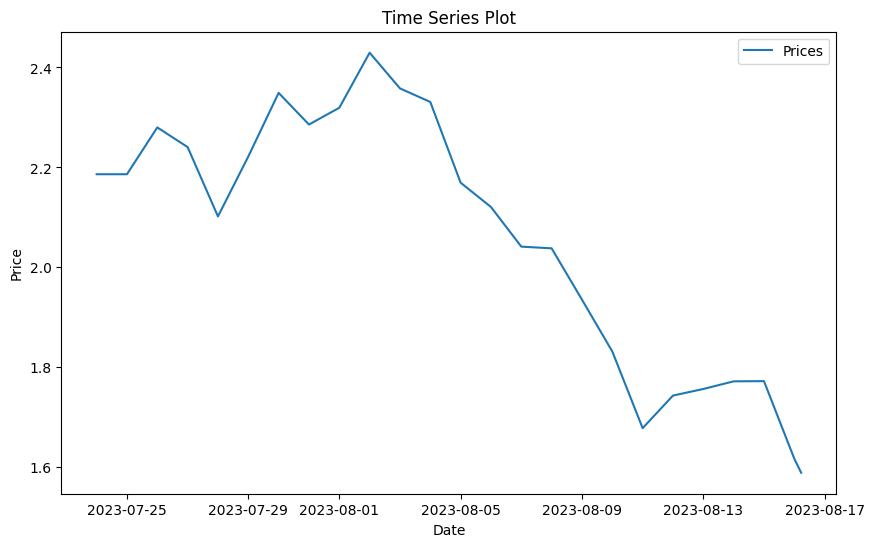

In [531]:
plt.figure(figsize=(10, 6), )
plt.plot(market_chart_coin_df.index, market_chart_coin_df["prices"], label="Prices")
# plt.plot(market_chart_coin_df.index, market_chart_coin_df["market_caps"], label="Market Caps")
# plt.plot(market_chart_coin_df.index, market_chart_coin_df["total_volumes"], label="Total Volumes")

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot')
plt.legend()
plt.show()



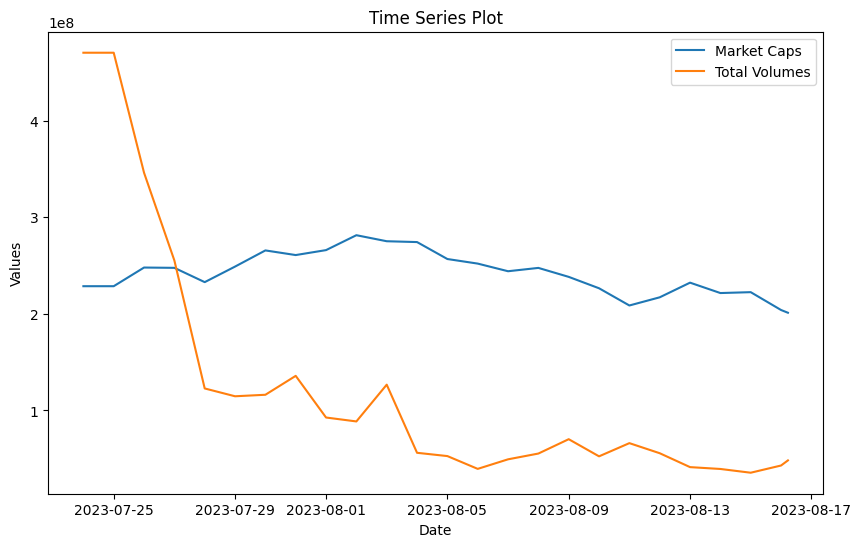

In [534]:
plt.figure(figsize=(10, 6), )
#plt.plot(market_chart_coin_df.index, market_chart_coin_df["prices"], label="Prices")
plt.plot(market_chart_coin_df.index, market_chart_coin_df["market_caps"], label="Market Caps")
plt.plot(market_chart_coin_df.index, market_chart_coin_df["total_volumes"], label="Total Volumes")

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot')
plt.legend()
plt.show()